<a href="https://colab.research.google.com/github/zakiyyah-ai/Risk-Credit-Analyst/blob/main/Risk_Credit_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


Data exploratory

In [3]:
df_train.shape

(3693, 11)

In [4]:
print(df_train.info())
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   3693 non-null   int64  
 1   customer_bod  3693 non-null   object 
 2   gender        3385 non-null   object 
 3   phone_flag    3693 non-null   float64
 4   student       3693 non-null   object 
 5   employment    2701 non-null   object 
 6   credit_card   3682 non-null   float64
 7   balance       3693 non-null   float64
 8   income        3693 non-null   float64
 9   tenure        3693 non-null   object 
 10  default       3693 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 317.5+ KB
None


customer_id     3693
customer_bod    2940
gender             2
phone_flag         2
student            2
employment         2
credit_card        2
balance         3509
income          3693
tenure            70
default            2
dtype: int64

In [5]:
#Replace Missing Value
df_train = df_train.dropna(axis=0)
df_train.isnull().sum()

customer_id     0
customer_bod    0
gender          0
phone_flag      0
student         0
employment      0
credit_card     0
balance         0
income          0
tenure          0
default         0
dtype: int64

In [6]:
df_test = df_test.dropna(axis=0)
df_test.isnull().sum()

customer_id     0
customer_bod    0
gender          0
phone_flag      0
student         0
employment      0
credit_card     0
balance         0
income          0
tenure          0
dtype: int64

In [7]:
#change customer_bod to age
df_train['customer_bod'] = pd.to_datetime(df_train['customer_bod'])
today = pd.to_datetime('today')
df_train['customer_bod'] = today.year - df_train['customer_bod'].dt.year
df_train = df_train.rename(columns={'customer_bod': 'age'})
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
4,3883,44,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0
7,7991,37,Male,1.0,No,Salaried,0.0,0.00,7112035.30,0yrs 0mon,0
8,9412,23,Female,1.0,No,Salaried,1.0,103848.03,6455858.31,2yrs 6mon,0
9,9464,40,Female,1.0,No,Salaried,0.0,0.00,3444624.30,0yrs 0mon,0


In [8]:
df_test['customer_bod'] = pd.to_datetime(df_test['customer_bod'])
today = pd.to_datetime('today')
df_test['customer_bod'] = today.year - df_test['customer_bod'].dt.year
df_test = df_test.rename(columns={'customer_bod': 'age'})
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,999,34,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,21,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,27,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,25,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon


In [9]:
# Create dummy variables, contain 0 or 1 as a result of one hot encoding depending on whether value is True
df_train['gender'] = df_train['gender'].map({'Female':1, 'Male':2})
df_train['student'] = df_train['student'].map({'Yes':1, 'No':2})
df_train['employment'] = df_train['employment'].map({'Self Employed':1, 'Salaried':2})
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,1,1.0,2,1,1.0,87104.12,5015120.75,4yrs 4mon,0
4,3883,44,2,1.0,2,2,0.0,48874.77,5445148.31,0yrs 10mon,0
7,7991,37,2,1.0,2,2,0.0,0.00,7112035.30,0yrs 0mon,0
8,9412,23,1,1.0,2,2,1.0,103848.03,6455858.31,2yrs 6mon,0
9,9464,40,1,1.0,2,2,0.0,0.00,3444624.30,0yrs 0mon,0


In [10]:
df_test['gender'] = df_test['gender'].map({'Female':1, 'Male':2})
df_test['student'] = df_test['student'].map({'Yes':1, 'No':2})
df_test['employment'] = df_test['employment'].map({'Self Employed':1, 'Salaried':2})
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,2,0.0,2,2,1.0,0.00,4430744.15,0yrs 0mon
1,999,34,1,0.0,2,2,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,21,2,1.0,2,2,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,27,2,1.0,2,2,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,25,2,0.0,2,1,0.0,92727.85,5659353.20,1yrs 3mon


In [11]:
#calculate tenure in months
df_train_= df_train.tenure.str.extractall('(\d+)').unstack()
df_train_.columns = df_train_.columns.droplevel(0)
df_train['tenure'] = df_train_.iloc[:,0].astype(int).mul(12) + df_train_.iloc[:,1].astype(int)
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,1,1.0,2,1,1.0,87104.12,5015120.75,52,0
4,3883,44,2,1.0,2,2,0.0,48874.77,5445148.31,10,0
7,7991,37,2,1.0,2,2,0.0,0.00,7112035.30,0,0
8,9412,23,1,1.0,2,2,1.0,103848.03,6455858.31,30,0
9,9464,40,1,1.0,2,2,0.0,0.00,3444624.30,0,0


In [12]:
df_test_= df_test.tenure.str.extractall('(\d+)').unstack()
df_test_.columns = df_test_.columns.droplevel(0)
df_test['tenure'] = df_test_.iloc[:,0].astype(int).mul(12) + df_test_.iloc[:,1].astype(int)
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,2,0.0,2,2,1.0,0.00,4430744.15,0
1,999,34,1,0.0,2,2,0.0,67431.40,3743149.53,7
2,2835,21,2,1.0,2,2,1.0,69128.28,4821579.61,23
3,5821,27,2,1.0,2,2,0.0,151051.78,3159764.69,10
4,2330,25,2,0.0,2,1,0.0,92727.85,5659353.20,15


In [13]:
numerikal = ['age','balance','income','tenure','default']
kategorikal = ['gender','phone_flag','student','employment','credit_card','default']

Data visualizatoin

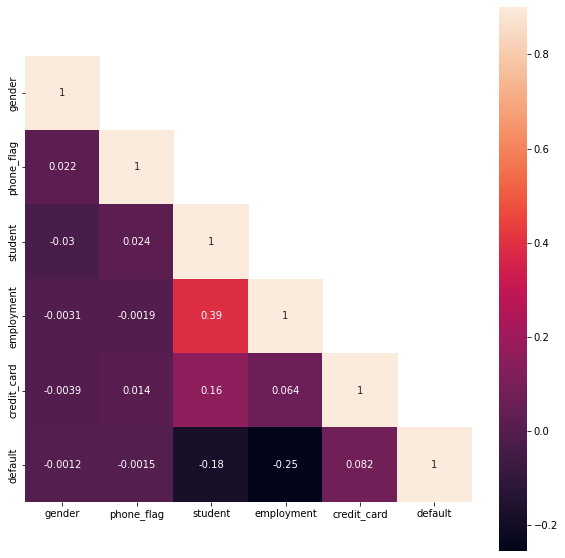

In [14]:
#create correlation with hitmap

#create correlation
#corr = df_train.corr(method = 'pearson')
corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (7,6))
fig.set_size_inches(10,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

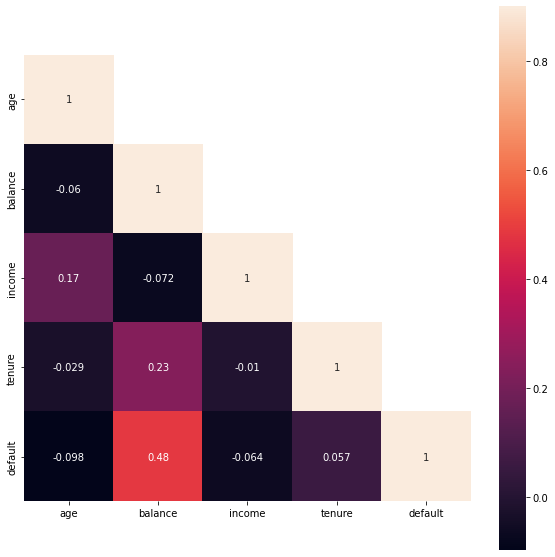

In [15]:
#create correlation with hitmap

#create correlation
corr = df_train[numerikal].corr(method = 'pearson')
#corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (7,6))
fig.set_size_inches(10,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


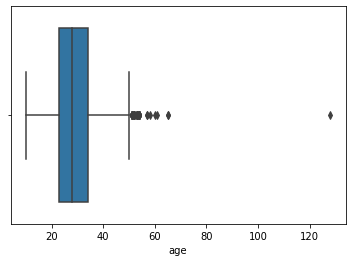

In [16]:
sns.boxplot(df_train['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


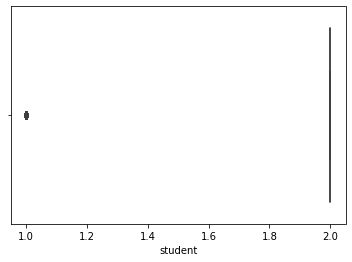

In [17]:
sns.boxplot(df_train['student'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


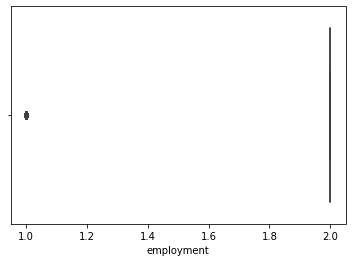

In [18]:
sns.boxplot(df_train['employment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


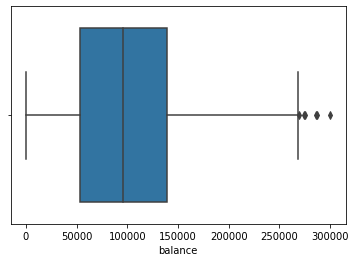

In [19]:
sns.boxplot(df_train['balance'])

Drop columns and split the data train

In [20]:
df_cek = df_train[['age','student','employment','credit_card','balance','income','tenure','default']]
df_cek_test = df_test[['age','student','employment','credit_card','balance','income','tenure']]

In [21]:
y_trains = df_cek['default']
X_trains = df_cek.drop(columns='default')

In [22]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.33, random_state=42)

Creating models with data train

1. k-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       755
           1       0.61      0.31      0.41        61

    accuracy                           0.93       816
   macro avg       0.78      0.65      0.69       816
weighted avg       0.92      0.93      0.92       816

accuracy score:  0.9338235294117647
auc score:  0.6477906850504833


2. SVM

In [25]:
from sklearn import svm

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       755
           1       0.00      0.00      0.00        61

    accuracy                           0.93       816
   macro avg       0.46      0.50      0.48       816
weighted avg       0.86      0.93      0.89       816

accuracy score:  0.9252450980392157
auc score:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       755
           1       0.60      0.61      0.60        61

    accuracy                           0.94       816
   macro avg       0.78      0.79      0.78       816
weighted avg       0.94      0.94      0.94       816

accuracy score:  0.9399509803921569
auc score:  0.7867223971338617


4. Multinomioal Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       755
           1       0.22      0.82      0.35        61

    accuracy                           0.77       816
   macro avg       0.60      0.79      0.61       816
weighted avg       0.92      0.77      0.82       816

accuracy score:  0.7720588235294118
auc score:  0.7939420258386711


5. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       755
           1       0.49      0.28      0.35        61

    accuracy                           0.92       816
   macro avg       0.71      0.63      0.66       816
weighted avg       0.91      0.92      0.91       816

accuracy score:  0.9240196078431373
auc score:  0.6274237324937575


6. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       755
           1       0.72      0.43      0.54        61

    accuracy                           0.94       816
   macro avg       0.84      0.71      0.75       816
weighted avg       0.94      0.94      0.94       816

accuracy score:  0.9448529411764706
auc score:  0.7064922375420694


7. Extra Trees

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [36]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       755
           1       0.77      0.39      0.52        61

    accuracy                           0.95       816
   macro avg       0.86      0.69      0.75       816
weighted avg       0.94      0.95      0.94       816

accuracy score:  0.946078431372549
auc score:  0.6920855498860059


Dikarenakan hasil paling bagus dari compare model adalah Decision Tree dengan auc 0.939, maka model tersebut akan dilakukan tuning paramter pada parameter max_depth

In [39]:
for i in [3,6,9,12]:
    clf = DecisionTreeClassifier(max_depth=None, min_samples_split=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('accuracy score dengan n_estimator = ',i,' : ',accuracy_score(y_test,y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print('auc scoredengan n_estimator = ',i,' : ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       755
           1       0.55      0.52      0.54        61

    accuracy                           0.93       816
   macro avg       0.76      0.75      0.75       816
weighted avg       0.93      0.93      0.93       816

accuracy score dengan n_estimator =  3  :  0.9325980392156863
auc scoredengan n_estimator =  3  :  0.7450765389208556
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       755
           1       0.58      0.49      0.53        61

    accuracy                           0.94       816
   macro avg       0.77      0.73      0.75       816
weighted avg       0.93      0.94      0.93       816

accuracy score dengan n_estimator =  6  :  0.9350490196078431
auc scoredengan n_estimator =  6  :  0.7313321029204213
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       755
 

Dengan dilakukan tuning pada n_estimator, maka didapat n_estimator 12 dengan auc 0.78

Hasil klasifikasi

Dari hasil uji evaluasi, disimpulkan bahawa metode Decision Tree memiliki auc score paling tinggi, yaitu sebanyak 0.78. Maka dari itu, dilakukan pemodelan untuk memprediksi datatest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=25, random_state=0)
clf.fit(X_trains, y_trains)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
y_pred = clf.predict(df_cek_test)

In [42]:
df_test['default'] = pd.Series(y_pred)

In [43]:
df_test['default'].value_counts()

0.0    129
1.0     22
Name: default, dtype: int64

In [46]:
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,9365,22,2,0.0,2,2,1.0,0.00,4430744.15,0,0.0
1,999,34,1,0.0,2,2,0.0,67431.40,3743149.53,7,0.0
2,2835,21,2,1.0,2,2,1.0,69128.28,4821579.61,23,0.0
3,5821,27,2,1.0,2,2,0.0,151051.78,3159764.69,10,0.0
4,2330,25,2,0.0,2,1,0.0,92727.85,5659353.20,15,0.0


In [47]:
df_test_final =  df_test[['customer_id','default']]

In [48]:
df_test_final.head()

,customer_id,default
0,9365,0.0
1,999,0.0
2,2835,0.0
3,5821,0.0
4,2330,0.0


In [49]:
df_test_final.to_csv("Hasil Testing Risk Creedit.csv")